# The Mnist Dataset

The [Mnist dataset](http://yann.lecun.com/exdb/mnist/) is collection of images containing hand written digits.
This dataset itself is presented in four files
The first file contains 60,000 training images.
The second file contains 60,000 labels for the training images.
The Third file contains 10,000 test images.
The fourth file contians 10,000 labels for the test images.

    The training set and labels are used to train a nural network to recognise the digits within the images.
    The test set is then passed into the nural netwrok and used to measure the performance of its difit recognition.

    These files are compressed using the gzip algorithm.

    We can open these files using pythons gzip package.

To open each file we can use the inbuilt python package 'gzip'

In [1]:
import keras as ks
import tensorflow as tf
import gzip
import numpy as np
import matplotlib.pyplot as plt
# Adapted from https://stackoverflow.com/questions/12902540/read-from-a-gzip-file-in-python

# Unzip the training images to the Data folder
# Set to read bytes
with gzip.open('Data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()

C:\Users\Kevin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Data structure of each file
Each file has the data stored as bytes and cannot be opened by conventional means.

 

# Big/Little Endian
Depending on which cpu you are using it can read the bytes differently (big endian, little endian).
Big endian treats the farthest binary value to the left as the most significant value while little endian treats the farthest binary value to the right as the most significant value. In the below example we are reading as big endian.

Each file is structured as follows:
- The first sixteen bytes in every file are reserved for storing information about the file.
- The first four bytes are the magic number. 
- This number should read 2051 as its 32 bit integer value and determines if you are reading the file correctly.

In [2]:
# Get the first four bytes as a slice
file_content[0:4]

b'\x00\x00\x08\x03'

In [3]:
# Get the data type
type(file_content)

bytes

In [4]:
# Print the magic number the value should be 2051if read correclty
int.from_bytes(file_content[0:4], byteorder='big')

2051

The next reserved four bytes are the amount of images the file contains.
In the below example we can see this file contains 10,000 images

In [5]:
file_content[4:8]

b"\x00\x00'\x10"

In [6]:
int.from_bytes(file_content[4:8], byteorder='big')

10000

The next eight bytes  spilt into groups of four, contain the dimensions of each image in this case they are 28 x 28 pixels.

In [7]:
file_content[8:12]

b'\x00\x00\x00\x1c'

In [8]:
int.from_bytes(file_content[8:12], byteorder='big')

28

In [9]:
int.from_bytes(file_content[12:16], byteorder='big')

28

From this point on we are reading pixel values as unsigned bytes and as the the dimensions of each image are 28 x 28 for every 784 bytes we should get a new image.
The values of each unsigned byte are between zero and 255.
Zero being a pixel value of white and 255 being a pixel value of black.
The pixel values between zero and 255 are darker shades of grey acending.


In [10]:
file_content[13:14]

b'\x00'

In [11]:
int.from_bytes(file_content[13:14], byteorder='big')

0

# DIsplaying the image
To display the image we create an aray from the next 784 bytes in the file and set it to a 2 dimensional array of unsigned bytes  using reshape. the tilda sign (as not opperator) is used to invert the values of the pixels to background white. If the tilda is not used a negative image will be shown. 

In [12]:
image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)

We then use matplotlib to render the image in greyscale

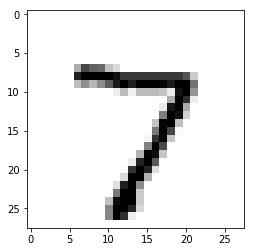

In [13]:
plt.imshow(image, cmap='gray')

# Displaying the image labels

To display the image labels we use the same process as above but we are only getting a single integer value back.
The files first 8 bytes are reserved for the magic number and amount of labels contained within the file.
After the first eight bytes each subsequent byte holds the label for the image.


In [14]:
# Adapted from: https://docs.python.org/3/library/gzip.html
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read()

In [15]:
int.from_bytes(labels [8:9], byteorder='big')

7

# Saving each image as png

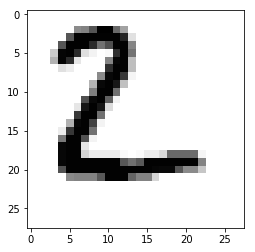

In [30]:
# Adapted from https://stackoverflow.com/questions/8024248/telling-python-to-save-a-txt-file-to-a-certain-directory-on-windows-and-mac
offset = 16
imgdim = 784
newStartPoint = 0
newEndPoint = 0
# @todo fix the loop centering modulo problem
for i in range(1000):
    if(i % (offset + imgdim)  == 0):
        newStartPoint += (offset + i) 
        newEndPoint = (newStartPoint + imgdim)
        image = ~np.array(list(file_content[newStartPoint:newEndPoint])).reshape(28,28).astype(np.uint8)

plt.imshow(image, cmap='gray')

   
